<a href="https://colab.research.google.com/github/Rahad31/Different-VAE-for-KL-FedDis/blob/main/VAE_KL_fedDis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


\begin{array}{|c|c|c|}
\hline
\textbf{$\beta$ Value} & \textbf{250 Epochs} & \textbf{500 Epochs} \\
\hline
0.5   & 60.64 & XX.XX \\
1.0   & 59.80 & 61.85 \\
2.0   & 60.72 & XX.XX \\
4.0   & 59.75 & 59.44 \\
5.0   & XX.XX & XX.XX \\
10.0  & XX.XX & XX.XX \\
\hline
\end{array}
'''




In [3]:
import re

# Your provided text
log = """
Epoch [1/10], Training Loss: 2.303, Validation Accuracy: 9.99%
Epoch [2/10], Training Loss: 2.302, Validation Accuracy: 9.99%
Epoch [3/10], Training Loss: 2.302, Validation Accuracy: 10.15%
Epoch [4/10], Training Loss: 2.301, Validation Accuracy: 10.62%
Epoch [5/10], Training Loss: 2.300, Validation Accuracy: 10.49%
Epoch [6/10], Training Loss: 2.299, Validation Accuracy: 10.43%
Epoch [7/10], Training Loss: 2.298, Validation Accuracy: 11.52%
Epoch [8/10], Training Loss: 2.296, Validation Accuracy: 13.86%
Epoch [9/10], Training Loss: 2.294, Validation Accuracy: 15.12%
Epoch [10/10], Training Loss: 2.292, Validation Accuracy: 14.71%
Epoch [1/10], Training Loss: 2.290, Validation Accuracy: 15.41%
Epoch [2/10], Training Loss: 2.286, Validation Accuracy: 16.32%
Epoch [3/10], Training Loss: 2.280, Validation Accuracy: 16.72%
Epoch [4/10], Training Loss: 2.272, Validation Accuracy: 17.02%
Epoch [5/10], Training Loss: 2.260, Validation Accuracy: 17.16%
Epoch [6/10], Training Loss: 2.244, Validation Accuracy: 17.67%
Epoch [7/10], Training Loss: 2.218, Validation Accuracy: 19.38%
Epoch [8/10], Training Loss: 2.182, Validation Accuracy: 20.94%
Epoch [9/10], Training Loss: 2.148, Validation Accuracy: 22.30%
Epoch [10/10], Training Loss: 2.127, Validation Accuracy: 23.95%
Epoch [1/10], Training Loss: 2.110, Validation Accuracy: 24.59%
Epoch [2/10], Training Loss: 2.096, Validation Accuracy: 25.06%
Epoch [3/10], Training Loss: 2.084, Validation Accuracy: 26.42%
Epoch [4/10], Training Loss: 2.071, Validation Accuracy: 26.14%
Epoch [5/10], Training Loss: 2.061, Validation Accuracy: 26.77%
Epoch [6/10], Training Loss: 2.046, Validation Accuracy: 27.71%
Epoch [7/10], Training Loss: 2.031, Validation Accuracy: 28.27%
Epoch [8/10], Training Loss: 2.012, Validation Accuracy: 29.19%
Epoch [9/10], Training Loss: 1.992, Validation Accuracy: 29.75%
Epoch [10/10], Training Loss: 1.964, Validation Accuracy: 29.97%
Epoch [1/10], Training Loss: 1.963, Validation Accuracy: 30.19%
Epoch [2/10], Training Loss: 1.949, Validation Accuracy: 31.33%
Epoch [3/10], Training Loss: 1.929, Validation Accuracy: 31.82%
Epoch [4/10], Training Loss: 1.910, Validation Accuracy: 32.26%
Epoch [5/10], Training Loss: 1.896, Validation Accuracy: 32.21%
Epoch [6/10], Training Loss: 1.880, Validation Accuracy: 33.82%
Epoch [7/10], Training Loss: 1.863, Validation Accuracy: 33.19%
Epoch [8/10], Training Loss: 1.854, Validation Accuracy: 34.32%
Epoch [9/10], Training Loss: 1.832, Validation Accuracy: 34.90%
Epoch [10/10], Training Loss: 1.818, Validation Accuracy: 35.05%
Epoch [1/10], Training Loss: 1.808, Validation Accuracy: 35.51%
Epoch [2/10], Training Loss: 1.797, Validation Accuracy: 36.15%
Epoch [3/10], Training Loss: 1.782, Validation Accuracy: 35.78%
Epoch [4/10], Training Loss: 1.762, Validation Accuracy: 36.87%
Epoch [5/10], Training Loss: 1.744, Validation Accuracy: 37.39%
Epoch [6/10], Training Loss: 1.729, Validation Accuracy: 37.94%
Epoch [7/10], Training Loss: 1.709, Validation Accuracy: 37.58%
Epoch [8/10], Training Loss: 1.697, Validation Accuracy: 37.92%
Epoch [9/10], Training Loss: 1.686, Validation Accuracy: 39.13%
Epoch [10/10], Training Loss: 1.677, Validation Accuracy: 39.45%
Epoch [1/10], Training Loss: 1.688, Validation Accuracy: 39.40%
Epoch [2/10], Training Loss: 1.679, Validation Accuracy: 38.98%
Epoch [3/10], Training Loss: 1.664, Validation Accuracy: 39.27%
Epoch [4/10], Training Loss: 1.655, Validation Accuracy: 39.13%
Epoch [5/10], Training Loss: 1.646, Validation Accuracy: 40.42%
Epoch [6/10], Training Loss: 1.630, Validation Accuracy: 41.20%
Epoch [7/10], Training Loss: 1.616, Validation Accuracy: 41.61%
Epoch [8/10], Training Loss: 1.610, Validation Accuracy: 42.00%
Epoch [9/10], Training Loss: 1.599, Validation Accuracy: 41.16%
Epoch [10/10], Training Loss: 1.582, Validation Accuracy: 41.59%
Epoch [1/10], Training Loss: 1.594, Validation Accuracy: 42.33%
Epoch [2/10], Training Loss: 1.573, Validation Accuracy: 43.17%
Epoch [3/10], Training Loss: 1.560, Validation Accuracy: 42.62%
Epoch [4/10], Training Loss: 1.553, Validation Accuracy: 43.21%
Epoch [5/10], Training Loss: 1.542, Validation Accuracy: 43.79%
Epoch [6/10], Training Loss: 1.528, Validation Accuracy: 43.79%
Epoch [7/10], Training Loss: 1.517, Validation Accuracy: 44.65%
Epoch [8/10], Training Loss: 1.506, Validation Accuracy: 43.73%
Epoch [9/10], Training Loss: 1.498, Validation Accuracy: 45.35%
Epoch [10/10], Training Loss: 1.488, Validation Accuracy: 44.82%
Epoch [1/10], Training Loss: 1.531, Validation Accuracy: 45.45%
Epoch [2/10], Training Loss: 1.518, Validation Accuracy: 45.65%
Epoch [3/10], Training Loss: 1.502, Validation Accuracy: 46.03%
Epoch [4/10], Training Loss: 1.495, Validation Accuracy: 46.46%
Epoch [5/10], Training Loss: 1.485, Validation Accuracy: 46.10%
Epoch [6/10], Training Loss: 1.479, Validation Accuracy: 47.01%
Epoch [7/10], Training Loss: 1.469, Validation Accuracy: 47.10%
Epoch [8/10], Training Loss: 1.456, Validation Accuracy: 47.54%
Epoch [9/10], Training Loss: 1.447, Validation Accuracy: 47.51%
Epoch [10/10], Training Loss: 1.447, Validation Accuracy: 48.28%
Epoch [1/10], Training Loss: 1.473, Validation Accuracy: 47.92%
Epoch [2/10], Training Loss: 1.458, Validation Accuracy: 46.64%
Epoch [3/10], Training Loss: 1.450, Validation Accuracy: 47.97%
Epoch [4/10], Training Loss: 1.441, Validation Accuracy: 48.45%
Epoch [5/10], Training Loss: 1.428, Validation Accuracy: 49.08%
Epoch [6/10], Training Loss: 1.422, Validation Accuracy: 49.66%
Epoch [7/10], Training Loss: 1.414, Validation Accuracy: 48.86%
Epoch [8/10], Training Loss: 1.409, Validation Accuracy: 49.09%
Epoch [9/10], Training Loss: 1.396, Validation Accuracy: 49.33%
Epoch [10/10], Training Loss: 1.385, Validation Accuracy: 49.78%
Epoch [1/10], Training Loss: 1.403, Validation Accuracy: 50.63%
Epoch [2/10], Training Loss: 1.389, Validation Accuracy: 50.03%
Epoch [3/10], Training Loss: 1.373, Validation Accuracy: 50.85%
Epoch [4/10], Training Loss: 1.372, Validation Accuracy: 50.86%
Epoch [5/10], Training Loss: 1.352, Validation Accuracy: 50.70%
Epoch [6/10], Training Loss: 1.348, Validation Accuracy: 50.25%
Epoch [7/10], Training Loss: 1.345, Validation Accuracy: 51.50%
Epoch [8/10], Training Loss: 1.326, Validation Accuracy: 51.77%
Epoch [9/10], Training Loss: 1.324, Validation Accuracy: 51.90%
Epoch [10/10], Training Loss: 1.311, Validation Accuracy: 52.26%
Epoch [1/10], Training Loss: 1.365, Validation Accuracy: 51.71%
Epoch [2/10], Training Loss: 1.360, Validation Accuracy: 52.55%
Epoch [3/10], Training Loss: 1.329, Validation Accuracy: 53.04%
Epoch [4/10], Training Loss: 1.318, Validation Accuracy: 52.94%
Epoch [5/10], Training Loss: 1.313, Validation Accuracy: 51.91%
Epoch [6/10], Training Loss: 1.305, Validation Accuracy: 52.51%
Epoch [7/10], Training Loss: 1.296, Validation Accuracy: 53.09%
Epoch [8/10], Training Loss: 1.286, Validation Accuracy: 53.18%
Epoch [9/10], Training Loss: 1.286, Validation Accuracy: 53.74%
Epoch [10/10], Training Loss: 1.275, Validation Accuracy: 53.21%
Epoch [1/10], Training Loss: 1.324, Validation Accuracy: 53.21%
Epoch [2/10], Training Loss: 1.304, Validation Accuracy: 53.43%
Epoch [3/10], Training Loss: 1.289, Validation Accuracy: 53.84%
Epoch [4/10], Training Loss: 1.290, Validation Accuracy: 53.87%
Epoch [5/10], Training Loss: 1.278, Validation Accuracy: 54.01%
Epoch [6/10], Training Loss: 1.260, Validation Accuracy: 53.55%
Epoch [7/10], Training Loss: 1.256, Validation Accuracy: 54.18%
Epoch [8/10], Training Loss: 1.246, Validation Accuracy: 54.14%
Epoch [9/10], Training Loss: 1.241, Validation Accuracy: 54.69%
Epoch [10/10], Training Loss: 1.229, Validation Accuracy: 54.98%
Epoch [1/10], Training Loss: 1.305, Validation Accuracy: 54.17%
Epoch [2/10], Training Loss: 1.288, Validation Accuracy: 55.50%
Epoch [3/10], Training Loss: 1.277, Validation Accuracy: 55.39%
Epoch [4/10], Training Loss: 1.254, Validation Accuracy: 55.52%
Epoch [5/10], Training Loss: 1.254, Validation Accuracy: 55.53%
Epoch [6/10], Training Loss: 1.242, Validation Accuracy: 55.94%
Epoch [7/10], Training Loss: 1.237, Validation Accuracy: 56.00%
Epoch [8/10], Training Loss: 1.224, Validation Accuracy: 56.07%
Epoch [9/10], Training Loss: 1.216, Validation Accuracy: 56.02%
Epoch [10/10], Training Loss: 1.218, Validation Accuracy: 55.66%
Epoch [1/10], Training Loss: 1.257, Validation Accuracy: 56.45%
Epoch [2/10], Training Loss: 1.235, Validation Accuracy: 57.09%
Epoch [3/10], Training Loss: 1.221, Validation Accuracy: 56.83%
Epoch [4/10], Training Loss: 1.208, Validation Accuracy: 56.37%
Epoch [5/10], Training Loss: 1.205, Validation Accuracy: 56.36%
Epoch [6/10], Training Loss: 1.196, Validation Accuracy: 56.97%
Epoch [7/10], Training Loss: 1.184, Validation Accuracy: 56.87%
Epoch [8/10], Training Loss: 1.178, Validation Accuracy: 56.79%
Epoch [9/10], Training Loss: 1.163, Validation Accuracy: 57.21%
Epoch [10/10], Training Loss: 1.162, Validation Accuracy: 57.03%
Epoch [1/10], Training Loss: 1.227, Validation Accuracy: 57.98%
Epoch [2/10], Training Loss: 1.203, Validation Accuracy: 57.47%
Epoch [3/10], Training Loss: 1.190, Validation Accuracy: 58.12%
Epoch [4/10], Training Loss: 1.171, Validation Accuracy: 57.84%
Epoch [5/10], Training Loss: 1.167, Validation Accuracy: 58.23%
Epoch [6/10], Training Loss: 1.163, Validation Accuracy: 57.85%
Epoch [7/10], Training Loss: 1.145, Validation Accuracy: 57.25%
Epoch [8/10], Training Loss: 1.134, Validation Accuracy: 57.77%
Epoch [9/10], Training Loss: 1.139, Validation Accuracy: 57.61%
Epoch [10/10], Training Loss: 1.132, Validation Accuracy: 57.15%
Epoch [1/10], Training Loss: 1.202, Validation Accuracy: 57.88%
Epoch [2/10], Training Loss: 1.176, Validation Accuracy: 58.75%
Epoch [3/10], Training Loss: 1.172, Validation Accuracy: 57.76%
Epoch [4/10], Training Loss: 1.150, Validation Accuracy: 58.69%
Epoch [5/10], Training Loss: 1.140, Validation Accuracy: 58.83%
Epoch [6/10], Training Loss: 1.142, Validation Accuracy: 58.95%
Epoch [7/10], Training Loss: 1.128, Validation Accuracy: 58.59%
Epoch [8/10], Training Loss: 1.113, Validation Accuracy: 58.29%
Epoch [9/10], Training Loss: 1.107, Validation Accuracy: 58.97%
Epoch [10/10], Training Loss: 1.095, Validation Accuracy: 59.07%
Epoch [1/10], Training Loss: 1.188, Validation Accuracy: 58.76%
Epoch [2/10], Training Loss: 1.156, Validation Accuracy: 58.98%
Epoch [3/10], Training Loss: 1.144, Validation Accuracy: 59.25%
Epoch [4/10], Training Loss: 1.135, Validation Accuracy: 58.28%
Epoch [5/10], Training Loss: 1.127, Validation Accuracy: 59.39%
Epoch [6/10], Training Loss: 1.110, Validation Accuracy: 58.95%
Epoch [7/10], Training Loss: 1.104, Validation Accuracy: 58.97%
Epoch [8/10], Training Loss: 1.094, Validation Accuracy: 58.58%
Epoch [9/10], Training Loss: 1.086, Validation Accuracy: 58.77%
Epoch [10/10], Training Loss: 1.079, Validation Accuracy: 59.05%
Epoch [1/10], Training Loss: 1.173, Validation Accuracy: 59.78%
Epoch [2/10], Training Loss: 1.142, Validation Accuracy: 59.88%
Epoch [3/10], Training Loss: 1.119, Validation Accuracy: 60.47%
Epoch [4/10], Training Loss: 1.112, Validation Accuracy: 60.56%
Epoch [5/10], Training Loss: 1.101, Validation Accuracy: 60.10%
Epoch [6/10], Training Loss: 1.086, Validation Accuracy: 59.98%
Epoch [7/10], Training Loss: 1.084, Validation Accuracy: 60.71%
Epoch [8/10], Training Loss: 1.068, Validation Accuracy: 60.42%
Epoch [9/10], Training Loss: 1.058, Validation Accuracy: 60.09%
Epoch [10/10], Training Loss: 1.048, Validation Accuracy: 60.97%
Epoch [1/10], Training Loss: 1.132, Validation Accuracy: 59.28%
Epoch [2/10], Training Loss: 1.112, Validation Accuracy: 62.01%
Epoch [3/10], Training Loss: 1.093, Validation Accuracy: 60.87%
Epoch [4/10], Training Loss: 1.083, Validation Accuracy: 61.07%
Epoch [5/10], Training Loss: 1.061, Validation Accuracy: 60.89%
Epoch [6/10], Training Loss: 1.061, Validation Accuracy: 60.89%
Epoch [7/10], Training Loss: 1.044, Validation Accuracy: 60.79%
Epoch [8/10], Training Loss: 1.036, Validation Accuracy: 61.29%
Epoch [9/10], Training Loss: 1.018, Validation Accuracy: 61.05%
Epoch [10/10], Training Loss: 1.016, Validation Accuracy: 60.87%
Epoch [1/10], Training Loss: 1.117, Validation Accuracy: 62.09%
Epoch [2/10], Training Loss: 1.084, Validation Accuracy: 62.64%
Epoch [3/10], Training Loss: 1.062, Validation Accuracy: 62.44%
Epoch [4/10], Training Loss: 1.058, Validation Accuracy: 61.07%
Epoch [5/10], Training Loss: 1.041, Validation Accuracy: 62.09%
Epoch [6/10], Training Loss: 1.022, Validation Accuracy: 62.18%
Epoch [7/10], Training Loss: 1.020, Validation Accuracy: 61.53%
Epoch [8/10], Training Loss: 1.009, Validation Accuracy: 62.68%
Epoch [9/10], Training Loss: 0.998, Validation Accuracy: 62.25%
Epoch [10/10], Training Loss: 0.982, Validation Accuracy: 62.09%
Epoch [1/10], Training Loss: 1.089, Validation Accuracy: 61.89%
Epoch [2/10], Training Loss: 1.060, Validation Accuracy: 61.77%
Epoch [3/10], Training Loss: 1.047, Validation Accuracy: 62.85%
Epoch [4/10], Training Loss: 1.023, Validation Accuracy: 62.66%
Epoch [5/10], Training Loss: 1.013, Validation Accuracy: 62.74%
Epoch [6/10], Training Loss: 1.002, Validation Accuracy: 63.20%
Epoch [7/10], Training Loss: 0.990, Validation Accuracy: 62.93%
Epoch [8/10], Training Loss: 0.974, Validation Accuracy: 63.52%
Epoch [9/10], Training Loss: 0.968, Validation Accuracy: 62.73%
Epoch [10/10], Training Loss: 0.963, Validation Accuracy: 62.70%
Epoch [1/10], Training Loss: 1.089, Validation Accuracy: 62.77%
Epoch [2/10], Training Loss: 1.056, Validation Accuracy: 63.25%
Epoch [3/10], Training Loss: 1.036, Validation Accuracy: 63.20%
Epoch [4/10], Training Loss: 1.017, Validation Accuracy: 62.92%
Epoch [5/10], Training Loss: 1.004, Validation Accuracy: 63.71%
Epoch [6/10], Training Loss: 0.981, Validation Accuracy: 63.60%
Epoch [7/10], Training Loss: 0.976, Validation Accuracy: 63.04%
Epoch [8/10], Training Loss: 0.960, Validation Accuracy: 62.68%
Epoch [9/10], Training Loss: 0.951, Validation Accuracy: 63.43%
Epoch [10/10], Training Loss: 0.938, Validation Accuracy: 63.10%
Epoch [1/10], Training Loss: 1.072, Validation Accuracy: 64.02%
Epoch [2/10], Training Loss: 1.035, Validation Accuracy: 63.07%
Epoch [3/10], Training Loss: 1.012, Validation Accuracy: 64.47%
Epoch [4/10], Training Loss: 0.992, Validation Accuracy: 64.60%
Epoch [5/10], Training Loss: 0.976, Validation Accuracy: 63.57%
Epoch [6/10], Training Loss: 0.961, Validation Accuracy: 64.95%
Epoch [7/10], Training Loss: 0.946, Validation Accuracy: 63.93%
Epoch [8/10], Training Loss: 0.941, Validation Accuracy: 64.00%
Epoch [9/10], Training Loss: 0.929, Validation Accuracy: 63.76%
Epoch [10/10], Training Loss: 0.918, Validation Accuracy: 63.79%
Epoch [1/10], Training Loss: 1.041, Validation Accuracy: 64.39%
Epoch [2/10], Training Loss: 1.011, Validation Accuracy: 64.90%
Epoch [3/10], Training Loss: 0.977, Validation Accuracy: 65.19%
Epoch [4/10], Training Loss: 0.968, Validation Accuracy: 64.05%
Epoch [5/10], Training Loss: 0.948, Validation Accuracy: 65.44%
Epoch [6/10], Training Loss: 0.944, Validation Accuracy: 64.12%
Epoch [7/10], Training Loss: 0.927, Validation Accuracy: 65.29%
Epoch [8/10], Training Loss: 0.916, Validation Accuracy: 64.72%
Epoch [9/10], Training Loss: 0.900, Validation Accuracy: 64.90%
Epoch [10/10], Training Loss: 0.899, Validation Accuracy: 65.25%
Epoch [1/10], Training Loss: 1.027, Validation Accuracy: 64.75%
Epoch [2/10], Training Loss: 0.986, Validation Accuracy: 64.58%
Epoch [3/10], Training Loss: 0.963, Validation Accuracy: 64.52%
Epoch [4/10], Training Loss: 0.949, Validation Accuracy: 65.83%
Epoch [5/10], Training Loss: 0.929, Validation Accuracy: 65.42%
Epoch [6/10], Training Loss: 0.912, Validation Accuracy: 65.38%
Epoch [7/10], Training Loss: 0.904, Validation Accuracy: 66.10%
Epoch [8/10], Training Loss: 0.885, Validation Accuracy: 65.57%
Epoch [9/10], Training Loss: 0.886, Validation Accuracy: 65.69%
Epoch [10/10], Training Loss: 0.863, Validation Accuracy: 65.30%
Epoch [1/10], Training Loss: 1.005, Validation Accuracy: 66.00%
Epoch [2/10], Training Loss: 0.970, Validation Accuracy: 65.53%
Epoch [3/10], Training Loss: 0.953, Validation Accuracy: 64.98%
Epoch [4/10], Training Loss: 0.937, Validation Accuracy: 65.52%
Epoch [5/10], Training Loss: 0.902, Validation Accuracy: 65.05%
Epoch [6/10], Training Loss: 0.895, Validation Accuracy: 65.90%
Epoch [7/10], Training Loss: 0.879, Validation Accuracy: 65.51%
Epoch [8/10], Training Loss: 0.878, Validation Accuracy: 66.09%
Epoch [9/10], Training Loss: 0.851, Validation Accuracy: 66.55%
Epoch [10/10], Training Loss: 0.844, Validation Accuracy: 66.16%
Epoch [1/10], Training Loss: 1.003, Validation Accuracy: 66.42%
Epoch [2/10], Training Loss: 0.965, Validation Accuracy: 66.71%
Epoch [3/10], Training Loss: 0.936, Validation Accuracy: 66.84%
Epoch [4/10], Training Loss: 0.910, Validation Accuracy: 66.18%
Epoch [5/10], Training Loss: 0.897, Validation Accuracy: 66.11%
Epoch [6/10], Training Loss: 0.881, Validation Accuracy: 66.30%
Epoch [7/10], Training Loss: 0.862, Validation Accuracy: 66.78%
Epoch [8/10], Training Loss: 0.851, Validation Accuracy: 66.59%
Epoch [9/10], Training Loss: 0.839, Validation Accuracy: 66.03%
Epoch [10/10], Training Loss: 0.824, Validation Accuracy: 66.47%
Epoch [1/10], Training Loss: 0.997, Validation Accuracy: 65.66%
Epoch [2/10], Training Loss: 0.947, Validation Accuracy: 66.83%
Epoch [3/10], Training Loss: 0.917, Validation Accuracy: 66.34%
Epoch [4/10], Training Loss: 0.891, Validation Accuracy: 66.44%
Epoch [5/10], Training Loss: 0.877, Validation Accuracy: 66.56%
Epoch [6/10], Training Loss: 0.860, Validation Accuracy: 67.10%
Epoch [7/10], Training Loss: 0.841, Validation Accuracy: 66.73%
Epoch [8/10], Training Loss: 0.821, Validation Accuracy: 67.13%
Epoch [9/10], Training Loss: 0.823, Validation Accuracy: 67.12%
Epoch [10/10], Training Loss: 0.802, Validation Accuracy: 67.43%
Epoch [1/10], Training Loss: 0.969, Validation Accuracy: 67.82%
Epoch [2/10], Training Loss: 0.922, Validation Accuracy: 66.93%
Epoch [3/10], Training Loss: 0.900, Validation Accuracy: 67.21%
Epoch [4/10], Training Loss: 0.873, Validation Accuracy: 68.00%
Epoch [5/10], Training Loss: 0.852, Validation Accuracy: 66.98%
Epoch [6/10], Training Loss: 0.842, Validation Accuracy: 67.10%
Epoch [7/10], Training Loss: 0.820, Validation Accuracy: 67.46%
Epoch [8/10], Training Loss: 0.812, Validation Accuracy: 67.96%
Epoch [9/10], Training Loss: 0.791, Validation Accuracy: 67.48%
Epoch [10/10], Training Loss: 0.783, Validation Accuracy: 67.62%
Epoch [1/10], Training Loss: 0.960, Validation Accuracy: 67.52%
Epoch [2/10], Training Loss: 0.906, Validation Accuracy: 68.48%
Epoch [3/10], Training Loss: 0.874, Validation Accuracy: 67.93%
Epoch [4/10], Training Loss: 0.854, Validation Accuracy: 68.40%
Epoch [5/10], Training Loss: 0.834, Validation Accuracy: 67.96%
Epoch [6/10], Training Loss: 0.820, Validation Accuracy: 68.34%
Epoch [7/10], Training Loss: 0.805, Validation Accuracy: 67.80%
Epoch [8/10], Training Loss: 0.794, Validation Accuracy: 67.30%
Epoch [9/10], Training Loss: 0.788, Validation Accuracy: 67.99%
Epoch [10/10], Training Loss: 0.770, Validation Accuracy: 67.62%
Epoch [1/10], Training Loss: 0.936, Validation Accuracy: 67.48%
Epoch [2/10], Training Loss: 0.892, Validation Accuracy: 68.80%
Epoch [3/10], Training Loss: 0.866, Validation Accuracy: 67.99%
Epoch [4/10], Training Loss: 0.832, Validation Accuracy: 68.60%
Epoch [5/10], Training Loss: 0.806, Validation Accuracy: 68.36%
Epoch [6/10], Training Loss: 0.794, Validation Accuracy: 68.82%
Epoch [7/10], Training Loss: 0.777, Validation Accuracy: 68.58%
Epoch [8/10], Training Loss: 0.759, Validation Accuracy: 67.88%
Epoch [9/10], Training Loss: 0.751, Validation Accuracy: 67.96%
Epoch [10/10], Training Loss: 0.742, Validation Accuracy: 67.65%
Epoch [1/10], Training Loss: 0.935, Validation Accuracy: 68.10%
Epoch [2/10], Training Loss: 0.882, Validation Accuracy: 68.52%
Epoch [3/10], Training Loss: 0.855, Validation Accuracy: 67.79%
Epoch [4/10], Training Loss: 0.820, Validation Accuracy: 68.14%
Epoch [5/10], Training Loss: 0.806, Validation Accuracy: 68.11%
Epoch [6/10], Training Loss: 0.784, Validation Accuracy: 68.47%
Epoch [7/10], Training Loss: 0.768, Validation Accuracy: 68.40%
Epoch [8/10], Training Loss: 0.758, Validation Accuracy: 68.40%
Epoch [9/10], Training Loss: 0.734, Validation Accuracy: 68.69%
Epoch [10/10], Training Loss: 0.720, Validation Accuracy: 67.58%
Epoch [1/10], Training Loss: 0.934, Validation Accuracy: 68.85%
Epoch [2/10], Training Loss: 0.866, Validation Accuracy: 69.02%
Epoch [3/10], Training Loss: 0.831, Validation Accuracy: 69.29%
Epoch [4/10], Training Loss: 0.804, Validation Accuracy: 69.68%
Epoch [5/10], Training Loss: 0.782, Validation Accuracy: 70.01%
Epoch [6/10], Training Loss: 0.758, Validation Accuracy: 68.99%
Epoch [7/10], Training Loss: 0.747, Validation Accuracy: 69.82%
Epoch [8/10], Training Loss: 0.720, Validation Accuracy: 69.49%
Epoch [9/10], Training Loss: 0.706, Validation Accuracy: 69.39%
Epoch [10/10], Training Loss: 0.689, Validation Accuracy: 69.87%
Epoch [1/10], Training Loss: 0.920, Validation Accuracy: 68.71%
Epoch [2/10], Training Loss: 0.865, Validation Accuracy: 69.92%
Epoch [3/10], Training Loss: 0.828, Validation Accuracy: 69.26%
Epoch [4/10], Training Loss: 0.802, Validation Accuracy: 70.37%
Epoch [5/10], Training Loss: 0.773, Validation Accuracy: 69.76%
Epoch [6/10], Training Loss: 0.751, Validation Accuracy: 69.81%
Epoch [7/10], Training Loss: 0.733, Validation Accuracy: 69.96%
Epoch [8/10], Training Loss: 0.719, Validation Accuracy: 70.54%
Epoch [9/10], Training Loss: 0.702, Validation Accuracy: 69.57%
Epoch [10/10], Training Loss: 0.682, Validation Accuracy: 69.93%
Epoch [1/10], Training Loss: 0.909, Validation Accuracy: 70.30%
Epoch [2/10], Training Loss: 0.845, Validation Accuracy: 70.10%
Epoch [3/10], Training Loss: 0.805, Validation Accuracy: 70.04%
Epoch [4/10], Training Loss: 0.770, Validation Accuracy: 70.45%
Epoch [5/10], Training Loss: 0.748, Validation Accuracy: 70.63%
Epoch [6/10], Training Loss: 0.732, Validation Accuracy: 69.82%
Epoch [7/10], Training Loss: 0.710, Validation Accuracy: 70.55%
Epoch [8/10], Training Loss: 0.691, Validation Accuracy: 70.32%
Epoch [9/10], Training Loss: 0.676, Validation Accuracy: 70.58%
Epoch [10/10], Training Loss: 0.666, Validation Accuracy: 70.18%
Epoch [1/10], Training Loss: 0.878, Validation Accuracy: 69.96%
Epoch [2/10], Training Loss: 0.819, Validation Accuracy: 70.49%
Epoch [3/10], Training Loss: 0.783, Validation Accuracy: 70.74%
Epoch [4/10], Training Loss: 0.753, Validation Accuracy: 70.83%
Epoch [5/10], Training Loss: 0.722, Validation Accuracy: 70.74%
Epoch [6/10], Training Loss: 0.705, Validation Accuracy: 70.91%
Epoch [7/10], Training Loss: 0.689, Validation Accuracy: 69.84%
Epoch [8/10], Training Loss: 0.668, Validation Accuracy: 70.65%
Epoch [9/10], Training Loss: 0.655, Validation Accuracy: 71.13%
Epoch [10/10], Training Loss: 0.643, Validation Accuracy: 69.37%
Epoch [1/10], Training Loss: 0.893, Validation Accuracy: 69.43%
Epoch [2/10], Training Loss: 0.817, Validation Accuracy: 69.84%
Epoch [3/10], Training Loss: 0.785, Validation Accuracy: 70.44%
Epoch [4/10], Training Loss: 0.743, Validation Accuracy: 70.03%
Epoch [5/10], Training Loss: 0.715, Validation Accuracy: 69.74%
Epoch [6/10], Training Loss: 0.696, Validation Accuracy: 70.62%
Epoch [7/10], Training Loss: 0.680, Validation Accuracy: 69.01%
Epoch [8/10], Training Loss: 0.662, Validation Accuracy: 69.93%
Epoch [9/10], Training Loss: 0.648, Validation Accuracy: 70.50%
Epoch [10/10], Training Loss: 0.629, Validation Accuracy: 70.09%
Epoch [1/10], Training Loss: 0.880, Validation Accuracy: 70.60%
Epoch [2/10], Training Loss: 0.798, Validation Accuracy: 71.46%
Epoch [3/10], Training Loss: 0.752, Validation Accuracy: 71.91%
Epoch [4/10], Training Loss: 0.720, Validation Accuracy: 72.01%
Epoch [5/10], Training Loss: 0.692, Validation Accuracy: 71.47%
Epoch [6/10], Training Loss: 0.665, Validation Accuracy: 71.29%
Epoch [7/10], Training Loss: 0.647, Validation Accuracy: 71.55%
Epoch [8/10], Training Loss: 0.633, Validation Accuracy: 71.56%
Epoch [9/10], Training Loss: 0.615, Validation Accuracy: 71.12%
Epoch [10/10], Training Loss: 0.606, Validation Accuracy: 70.61%
Epoch [1/10], Training Loss: 0.864, Validation Accuracy: 71.87%
Epoch [2/10], Training Loss: 0.788, Validation Accuracy: 70.89%
Epoch [3/10], Training Loss: 0.749, Validation Accuracy: 71.83%
Epoch [4/10], Training Loss: 0.724, Validation Accuracy: 70.99%
Epoch [5/10], Training Loss: 0.695, Validation Accuracy: 71.80%
Epoch [6/10], Training Loss: 0.675, Validation Accuracy: 71.96%
Epoch [7/10], Training Loss: 0.648, Validation Accuracy: 71.89%
Epoch [8/10], Training Loss: 0.629, Validation Accuracy: 70.98%
Epoch [9/10], Training Loss: 0.623, Validation Accuracy: 71.91%
Epoch [10/10], Training Loss: 0.605, Validation Accuracy: 71.01%
Epoch [1/10], Training Loss: 0.859, Validation Accuracy: 71.83%
Epoch [2/10], Training Loss: 0.782, Validation Accuracy: 72.68%
Epoch [3/10], Training Loss: 0.737, Validation Accuracy: 71.58%
Epoch [4/10], Training Loss: 0.701, Validation Accuracy: 71.69%
Epoch [5/10], Training Loss: 0.672, Validation Accuracy: 72.15%
Epoch [6/10], Training Loss: 0.646, Validation Accuracy: 71.47%
Epoch [7/10], Training Loss: 0.627, Validation Accuracy: 71.14%
Epoch [8/10], Training Loss: 0.611, Validation Accuracy: 71.41%
Epoch [9/10], Training Loss: 0.604, Validation Accuracy: 71.79%
Epoch [10/10], Training Loss: 0.582, Validation Accuracy: 72.00%
Epoch [1/10], Training Loss: 0.837, Validation Accuracy: 71.70%
Epoch [2/10], Training Loss: 0.760, Validation Accuracy: 72.59%
Epoch [3/10], Training Loss: 0.711, Validation Accuracy: 71.42%
Epoch [4/10], Training Loss: 0.678, Validation Accuracy: 72.26%
Epoch [5/10], Training Loss: 0.648, Validation Accuracy: 71.50%
Epoch [6/10], Training Loss: 0.625, Validation Accuracy: 72.01%
Epoch [7/10], Training Loss: 0.604, Validation Accuracy: 72.53%
Epoch [8/10], Training Loss: 0.588, Validation Accuracy: 71.67%
Epoch [9/10], Training Loss: 0.571, Validation Accuracy: 71.88%
Epoch [10/10], Training Loss: 0.556, Validation Accuracy: 71.97%
Epoch [1/10], Training Loss: 0.825, Validation Accuracy: 71.68%
Epoch [2/10], Training Loss: 0.747, Validation Accuracy: 72.35%
Epoch [3/10], Training Loss: 0.701, Validation Accuracy: 72.33%
Epoch [4/10], Training Loss: 0.664, Validation Accuracy: 71.91%
Epoch [5/10], Training Loss: 0.642, Validation Accuracy: 72.20%
Epoch [6/10], Training Loss: 0.608, Validation Accuracy: 72.12%
Epoch [7/10], Training Loss: 0.588, Validation Accuracy: 72.22%
Epoch [8/10], Training Loss: 0.566, Validation Accuracy: 71.24%
Epoch [9/10], Training Loss: 0.564, Validation Accuracy: 71.51%
Epoch [10/10], Training Loss: 0.540, Validation Accuracy: 71.87%
Epoch [1/10], Training Loss: 0.826, Validation Accuracy: 71.72%
Epoch [2/10], Training Loss: 0.743, Validation Accuracy: 72.64%
Epoch [3/10], Training Loss: 0.680, Validation Accuracy: 72.90%
Epoch [4/10], Training Loss: 0.637, Validation Accuracy: 73.22%
Epoch [5/10], Training Loss: 0.612, Validation Accuracy: 72.51%
Epoch [6/10], Training Loss: 0.589, Validation Accuracy: 72.93%
Epoch [7/10], Training Loss: 0.567, Validation Accuracy: 73.23%
Epoch [8/10], Training Loss: 0.545, Validation Accuracy: 72.94%
Epoch [9/10], Training Loss: 0.525, Validation Accuracy: 72.86%
Epoch [10/10], Training Loss: 0.506, Validation Accuracy: 72.98%
Epoch [1/10], Training Loss: 0.832, Validation Accuracy: 72.30%
Epoch [2/10], Training Loss: 0.723, Validation Accuracy: 73.39%
Epoch [3/10], Training Loss: 0.681, Validation Accuracy: 72.97%
Epoch [4/10], Training Loss: 0.642, Validation Accuracy: 72.95%
Epoch [5/10], Training Loss: 0.615, Validation Accuracy: 72.55%
Epoch [6/10], Training Loss: 0.591, Validation Accuracy: 73.06%
Epoch [7/10], Training Loss: 0.572, Validation Accuracy: 73.02%
Epoch [8/10], Training Loss: 0.548, Validation Accuracy: 73.43%
Epoch [9/10], Training Loss: 0.534, Validation Accuracy: 73.35%
Epoch [10/10], Training Loss: 0.516, Validation Accuracy: 72.48%
Epoch [1/10], Training Loss: 0.826, Validation Accuracy: 72.55%
Epoch [2/10], Training Loss: 0.719, Validation Accuracy: 73.33%
Epoch [3/10], Training Loss: 0.665, Validation Accuracy: 72.77%
Epoch [4/10], Training Loss: 0.636, Validation Accuracy: 73.32%
Epoch [5/10], Training Loss: 0.600, Validation Accuracy: 73.17%
Epoch [6/10], Training Loss: 0.573, Validation Accuracy: 73.73%
Epoch [7/10], Training Loss: 0.548, Validation Accuracy: 72.74%
Epoch [8/10], Training Loss: 0.530, Validation Accuracy: 72.63%
Epoch [9/10], Training Loss: 0.518, Validation Accuracy: 73.45%
Epoch [10/10], Training Loss: 0.486, Validation Accuracy: 72.52%
Epoch [1/10], Training Loss: 0.793, Validation Accuracy: 72.51%
Epoch [2/10], Training Loss: 0.699, Validation Accuracy: 72.52%
Epoch [3/10], Training Loss: 0.648, Validation Accuracy: 73.24%
Epoch [4/10], Training Loss: 0.609, Validation Accuracy: 72.80%
Epoch [5/10], Training Loss: 0.584, Validation Accuracy: 73.70%
Epoch [6/10], Training Loss: 0.548, Validation Accuracy: 73.98%
Epoch [7/10], Training Loss: 0.529, Validation Accuracy: 73.53%
Epoch [8/10], Training Loss: 0.504, Validation Accuracy: 73.78%
Epoch [9/10], Training Loss: 0.492, Validation Accuracy: 72.68%
Epoch [10/10], Training Loss: 0.481, Validation Accuracy: 73.07%
Epoch [1/10], Training Loss: 0.799, Validation Accuracy: 72.54%
Epoch [2/10], Training Loss: 0.693, Validation Accuracy: 72.38%
Epoch [3/10], Training Loss: 0.638, Validation Accuracy: 73.78%
Epoch [4/10], Training Loss: 0.593, Validation Accuracy: 73.35%
Epoch [5/10], Training Loss: 0.567, Validation Accuracy: 73.23%
Epoch [6/10], Training Loss: 0.533, Validation Accuracy: 73.66%
Epoch [7/10], Training Loss: 0.517, Validation Accuracy: 73.44%
Epoch [8/10], Training Loss: 0.495, Validation Accuracy: 73.01%
Epoch [9/10], Training Loss: 0.473, Validation Accuracy: 72.87%
Epoch [10/10], Training Loss: 0.459, Validation Accuracy: 74.02%
Epoch [1/10], Training Loss: 0.797, Validation Accuracy: 73.26%
Epoch [2/10], Training Loss: 0.665, Validation Accuracy: 74.34%
Epoch [3/10], Training Loss: 0.614, Validation Accuracy: 74.66%
Epoch [4/10], Training Loss: 0.574, Validation Accuracy: 74.37%
Epoch [5/10], Training Loss: 0.542, Validation Accuracy: 73.41%
Epoch [6/10], Training Loss: 0.514, Validation Accuracy: 74.94%
Epoch [7/10], Training Loss: 0.493, Validation Accuracy: 74.29%
Epoch [8/10], Training Loss: 0.477, Validation Accuracy: 74.21%
Epoch [9/10], Training Loss: 0.458, Validation Accuracy: 74.44%
Epoch [10/10], Training Loss: 0.434, Validation Accuracy: 73.34%
Epoch [1/10], Training Loss: 0.786, Validation Accuracy: 73.33%
Epoch [2/10], Training Loss: 0.668, Validation Accuracy: 73.92%
Epoch [3/10], Training Loss: 0.614, Validation Accuracy: 73.97%
Epoch [4/10], Training Loss: 0.580, Validation Accuracy: 74.45%
Epoch [5/10], Training Loss: 0.546, Validation Accuracy: 74.61%
Epoch [6/10], Training Loss: 0.522, Validation Accuracy: 74.73%
Epoch [7/10], Training Loss: 0.494, Validation Accuracy: 74.37%
Epoch [8/10], Training Loss: 0.472, Validation Accuracy: 74.02%
Epoch [9/10], Training Loss: 0.447, Validation Accuracy: 74.62%
Epoch [10/10], Training Loss: 0.437, Validation Accuracy: 74.53%
Epoch [1/10], Training Loss: 0.781, Validation Accuracy: 74.28%
Epoch [2/10], Training Loss: 0.669, Validation Accuracy: 73.60%
Epoch [3/10], Training Loss: 0.599, Validation Accuracy: 73.92%
Epoch [4/10], Training Loss: 0.557, Validation Accuracy: 74.53%
Epoch [5/10], Training Loss: 0.523, Validation Accuracy: 74.72%
Epoch [6/10], Training Loss: 0.491, Validation Accuracy: 74.69%
Epoch [7/10], Training Loss: 0.469, Validation Accuracy: 74.27%
Epoch [8/10], Training Loss: 0.448, Validation Accuracy: 74.43%
Epoch [9/10], Training Loss: 0.427, Validation Accuracy: 74.90%
Epoch [10/10], Training Loss: 0.416, Validation Accuracy: 74.00%
"""

# Regular expression to find validation accuracies
accuracies = re.findall(r'Validation Accuracy: (\d+\.\d+)%', log)

# Convert accuracies from string to float
accuracies = [float(acc) for acc in accuracies]

# Print accuracies
print("Accuracies:", accuracies)

# Print size of the array
print("Size of array:", len(accuracies))


Accuracies: [9.99, 9.99, 10.15, 10.62, 10.49, 10.43, 11.52, 13.86, 15.12, 14.71, 15.41, 16.32, 16.72, 17.02, 17.16, 17.67, 19.38, 20.94, 22.3, 23.95, 24.59, 25.06, 26.42, 26.14, 26.77, 27.71, 28.27, 29.19, 29.75, 29.97, 30.19, 31.33, 31.82, 32.26, 32.21, 33.82, 33.19, 34.32, 34.9, 35.05, 35.51, 36.15, 35.78, 36.87, 37.39, 37.94, 37.58, 37.92, 39.13, 39.45, 39.4, 38.98, 39.27, 39.13, 40.42, 41.2, 41.61, 42.0, 41.16, 41.59, 42.33, 43.17, 42.62, 43.21, 43.79, 43.79, 44.65, 43.73, 45.35, 44.82, 45.45, 45.65, 46.03, 46.46, 46.1, 47.01, 47.1, 47.54, 47.51, 48.28, 47.92, 46.64, 47.97, 48.45, 49.08, 49.66, 48.86, 49.09, 49.33, 49.78, 50.63, 50.03, 50.85, 50.86, 50.7, 50.25, 51.5, 51.77, 51.9, 52.26, 51.71, 52.55, 53.04, 52.94, 51.91, 52.51, 53.09, 53.18, 53.74, 53.21, 53.21, 53.43, 53.84, 53.87, 54.01, 53.55, 54.18, 54.14, 54.69, 54.98, 54.17, 55.5, 55.39, 55.52, 55.53, 55.94, 56.0, 56.07, 56.02, 55.66, 56.45, 57.09, 56.83, 56.37, 56.36, 56.97, 56.87, 56.79, 57.21, 57.03, 57.98, 57.47, 58.12, 

Array for 250 BVAe

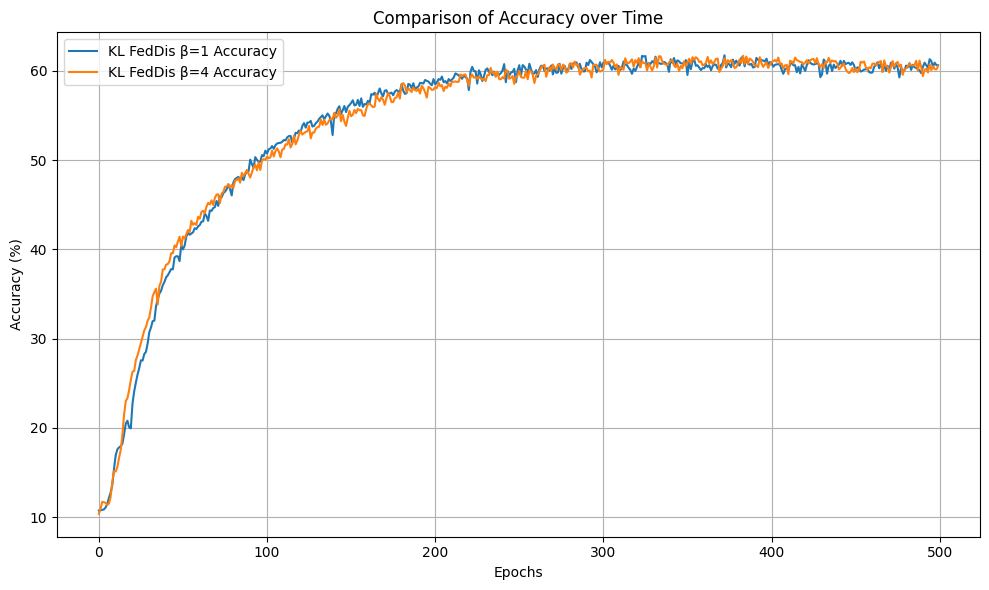

In [ ]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
KL_FedDisb1_accuracy = [9.99, 9.99, 10.15, 10.62, 10.49, 10.43, 11.52, 13.86, 15.12, 14.71, 15.41, 16.32, 16.72, 17.02, 17.16, 17.67, 19.38, 20.94, 22.3, 23.95, 24.59, 25.06, 26.42, 26.14, 26.77, 27.71, 28.27, 29.19, 29.75, 29.97, 30.19, 31.33, 31.82, 32.26, 32.21, 33.82, 33.19, 34.32, 34.9, 35.05, 35.51, 36.15, 35.78, 36.87, 37.39, 37.94, 37.58, 37.92, 39.13, 39.45, 39.4, 38.98, 39.27, 39.13, 40.42, 41.2, 41.61, 42.0, 41.16, 41.59, 42.33, 43.17, 42.62, 43.21, 43.79, 43.79, 44.65, 43.73, 45.35, 44.82, 45.45, 45.65, 46.03, 46.46, 46.1, 47.01, 47.1, 47.54, 47.51, 48.28, 47.92, 46.64, 47.97, 48.45, 49.08, 49.66, 48.86, 49.09, 49.33, 49.78, 50.63, 50.03, 50.85, 50.86, 50.7, 50.25, 51.5, 51.77, 51.9, 52.26, 51.71, 52.55, 53.04, 52.94, 51.91, 52.51, 53.09, 53.18, 53.74, 53.21, 53.21, 53.43, 53.84, 53.87, 54.01, 53.55, 54.18, 54.14, 54.69, 54.98, 54.17, 55.5, 55.39, 55.52, 55.53, 55.94, 56.0, 56.07, 56.02, 55.66, 56.45, 57.09, 56.83, 56.37, 56.36, 56.97, 56.87, 56.79, 57.21, 57.03, 57.98, 57.47, 58.12, 57.84, 58.23, 57.85, 57.25, 57.77, 57.61, 57.15, 57.88, 58.75, 57.76, 58.69, 58.83, 58.95, 58.59, 58.29, 58.97, 59.07, 58.76, 58.98, 59.25, 58.28, 59.39, 58.95, 58.97, 58.58, 58.77, 59.05, 59.78, 59.88, 60.47, 60.56, 60.1, 59.98, 60.71, 60.42, 60.09, 60.97, 59.28, 62.01, 60.87, 61.07, 60.89, 60.89, 60.79, 61.29, 61.05, 60.87, 62.09, 62.64, 62.44, 61.07, 62.09, 62.18, 61.53, 62.68, 62.25, 62.09, 61.89, 61.77, 62.85, 62.66, 62.74, 63.2, 62.93, 63.52, 62.73, 62.7, 62.77, 63.25, 63.2, 62.92, 63.71, 63.6, 63.04, 62.68, 63.43, 63.1, 64.02, 63.07, 64.47, 64.6, 63.57, 64.95, 63.93, 64.0, 63.76, 63.79, 64.39, 64.9, 65.19, 64.05, 65.44, 64.12, 65.29, 64.72, 64.9, 65.25, 64.75, 64.58, 64.52, 65.83, 65.42, 65.38, 66.1, 65.57, 65.69, 65.3, 66.0, 65.53, 64.98, 65.52, 65.05, 65.9, 65.51, 66.09, 66.55, 66.16, 66.42, 66.71, 66.84, 66.18, 66.11, 66.3, 66.78, 66.59, 66.03, 66.47, 65.66, 66.83, 66.34, 66.44, 66.56, 67.1, 66.73, 67.13, 67.12, 67.43, 67.82, 66.93, 67.21, 68.0, 66.98, 67.1, 67.46, 67.96, 67.48, 67.62, 67.52, 68.48, 67.93, 68.4, 67.96, 68.34, 67.8, 67.3, 67.99, 67.62, 67.48, 68.8, 67.99, 68.6, 68.36, 68.82, 68.58, 67.88, 67.96, 67.65, 68.1, 68.52, 67.79, 68.14, 68.11, 68.47, 68.4, 68.4, 68.69, 67.58, 68.85, 69.02, 69.29, 69.68, 70.01, 68.99, 69.82, 69.49, 69.39, 69.87, 68.71, 69.92, 69.26, 70.37, 69.76, 69.81, 69.96, 70.54, 69.57, 69.93, 70.3, 70.1, 70.04, 70.45, 70.63, 69.82, 70.55, 70.32, 70.58, 70.18, 69.96, 70.49, 70.74, 70.83, 70.74, 70.91, 69.84, 70.65, 71.13, 69.37, 69.43, 69.84, 70.44, 70.03, 69.74, 70.62, 69.01, 69.93, 70.5, 70.09, 70.6, 71.46, 71.91, 72.01, 71.47, 71.29, 71.55, 71.56, 71.12, 70.61, 71.87, 70.89, 71.83, 70.99, 71.8, 71.96, 71.89, 70.98, 71.91, 71.01, 71.83, 72.68, 71.58, 71.69, 72.15, 71.47, 71.14, 71.41, 71.79, 72.0, 71.7, 72.59, 71.42, 72.26, 71.5, 72.01, 72.53, 71.67, 71.88, 71.97, 71.68, 72.35, 72.33, 71.91, 72.2, 72.12, 72.22, 71.24, 71.51, 71.87, 71.72, 72.64, 72.9, 73.22, 72.51, 72.93, 73.23, 72.94, 72.86, 72.98, 72.3, 73.39, 72.97, 72.95, 72.55, 73.06, 73.02, 73.43, 73.35, 72.48, 72.55, 73.33, 72.77, 73.32, 73.17, 73.73, 72.74, 72.63, 73.45, 72.52, 72.51, 72.52, 73.24, 72.8, 73.7, 73.98, 73.53, 73.78, 72.68, 73.07, 72.54, 72.38, 73.78, 73.35, 73.23, 73.66, 73.44, 73.01, 72.87, 74.02, 73.26, 74.34, 74.66, 74.37, 73.41, 74.94, 74.29, 74.21, 74.44, 73.34, 73.33, 73.92, 73.97, 74.45, 74.61, 74.73, 74.37, 74.02, 74.62, 74.53, 74.28, 73.6, 73.92, 74.53, 74.72, 74.69, 74.27, 74.43, 74.9, 74.0]
KL_FedDisb4_accuracy =  [10.38, 10.94, 11.72, 11.68, 11.6, 11.38, 11.52, 12.27, 13.94, 15.19, 15.12, 15.61, 16.64, 17.53, 19.21, 21.53, 23.01, 23.34, 24.25, 25.36, 26.3, 26.39, 27.61, 28.12, 28.83, 29.58, 30.28, 30.92, 31.31, 32.0, 32.39, 33.49, 34.76, 35.22, 35.6, 33.84, 35.93, 36.39, 37.76, 37.77, 38.29, 38.36, 38.67, 39.58, 39.57, 40.46, 40.25, 40.88, 41.43, 40.36, 41.45, 41.22, 41.71, 42.18, 41.95, 43.21, 42.77, 42.95, 42.75, 43.66, 43.44, 44.21, 44.34, 44.06, 44.8, 45.22, 45.04, 45.5, 44.99, 45.8, 46.15, 46.18, 45.19, 46.26, 46.43, 47.02, 47.07, 47.26, 46.92, 47.22, 46.9, 47.72, 47.77, 47.99, 47.48, 48.58, 48.21, 48.54, 48.91, 48.47, 48.06, 48.63, 49.2, 49.5, 48.86, 49.76, 48.91, 49.95, 50.12, 50.05, 50.41, 50.23, 50.32, 51.08, 50.42, 50.99, 51.32, 50.97, 50.33, 51.19, 51.26, 51.78, 51.75, 52.36, 51.42, 51.81, 52.76, 51.78, 52.2, 52.87, 53.29, 52.87, 53.04, 53.18, 53.23, 53.85, 52.45, 53.09, 53.1, 53.54, 53.7, 53.76, 54.55, 53.95, 54.54, 53.97, 54.12, 54.48, 54.68, 54.6, 55.29, 54.75, 55.0, 55.7, 54.37, 55.07, 54.31, 53.84, 54.76, 55.53, 54.93, 55.09, 55.64, 55.28, 55.76, 55.59, 55.62, 55.04, 54.95, 55.78, 56.27, 56.36, 56.14, 55.94, 56.01, 57.43, 56.87, 56.61, 57.07, 56.76, 56.21, 56.95, 57.53, 57.13, 56.51, 56.51, 56.96, 57.04, 57.59, 56.91, 58.49, 58.64, 58.37, 57.6, 58.06, 57.85, 57.64, 58.14, 57.86, 57.76, 58.04, 57.47, 58.35, 58.07, 57.62, 57.01, 58.23, 58.1, 57.88, 57.91, 58.2, 58.08, 58.71, 58.28, 58.42, 57.75, 58.23, 58.11, 58.6, 58.27, 58.83, 58.78, 58.83, 58.77, 58.79, 59.62, 59.44, 59.57, 59.61, 58.96, 58.33, 59.36, 59.59, 59.25, 59.34, 59.11, 59.38, 59.17, 59.02, 59.14, 58.87, 59.53, 59.54, 60.34, 59.75, 59.86, 59.35, 59.92, 59.09, 59.07, 59.31, 59.15, 60.16, 59.93, 59.13, 59.23, 59.43, 58.55, 59.34, 59.54, 60.01, 59.32, 59.24, 59.25, 60.02, 59.07, 60.05, 59.95, 59.56, 58.65, 59.49, 59.63, 59.94, 60.4, 60.58, 60.69, 59.35, 60.01, 60.45, 60.03, 60.72, 60.33, 60.19, 60.75, 60.68, 60.13, 60.72, 60.43, 59.81, 59.95, 60.85, 60.84, 60.4, 61.05, 60.64, 60.71, 59.59, 59.95, 60.26, 60.29, 60.35, 59.95, 60.04, 59.27, 60.65, 60.69, 60.7, 60.2, 59.93, 60.01, 60.2, 61.24, 60.77, 61.03, 60.95, 61.22, 60.94, 60.43, 60.74, 59.56, 60.43, 60.32, 60.14, 61.42, 60.9, 60.88, 61.04, 61.31, 60.47, 61.22, 60.92, 61.44, 60.41, 61.08, 60.89, 60.89, 60.06, 60.81, 60.49, 60.05, 60.51, 61.49, 60.38, 61.64, 61.64, 61.07, 60.82, 60.75, 60.64, 60.95, 61.12, 61.27, 60.61, 60.42, 60.82, 59.99, 60.57, 60.3, 61.07, 60.54, 60.96, 61.37, 60.8, 61.54, 61.26, 61.54, 61.38, 61.0, 61.08, 60.62, 60.73, 60.89, 61.57, 60.83, 61.18, 60.77, 61.02, 61.36, 61.39, 59.89, 60.25, 60.56, 61.43, 60.62, 61.22, 60.97, 61.21, 60.95, 60.34, 60.41, 60.8, 61.29, 60.89, 61.71, 60.79, 61.62, 60.79, 61.4, 61.25, 61.04, 60.59, 60.63, 60.42, 61.55, 60.88, 60.46, 60.73, 60.95, 60.34, 60.7, 61.02, 61.09, 61.23, 61.02, 61.5, 60.77, 60.84, 60.28, 60.62, 60.68, 59.64, 61.15, 61.02, 60.84, 61.5, 61.22, 61.13, 61.01, 60.99, 60.74, 60.96, 61.2, 60.83, 61.19, 61.31, 61.34, 60.91, 61.43, 60.69, 60.44, 60.76, 60.33, 61.01, 60.98, 61.47, 60.92, 61.18, 61.06, 61.12, 60.86, 60.19, 60.35, 60.7, 60.82, 60.22, 59.95, 59.76, 59.91, 60.32, 59.88, 60.29, 59.86, 60.12, 61.04, 60.94, 61.07, 60.45, 60.12, 60.4, 60.3, 60.81, 60.84, 60.63, 60.83, 61.01, 61.11, 59.88, 61.19, 60.51, 60.53, 59.82, 60.44, 61.11, 60.49, 60.87, 61.01, 60.51, 60.7, 59.57, 60.21, 60.28, 60.49, 60.83, 60.64, 60.62, 60.64, 61.14, 60.02, 61.16, 60.43, 59.42, 60.14, 60.24, 59.83, 60.75, 60.1, 60.51, 60.2, 60.17, 60.54]




# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')

plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')



# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


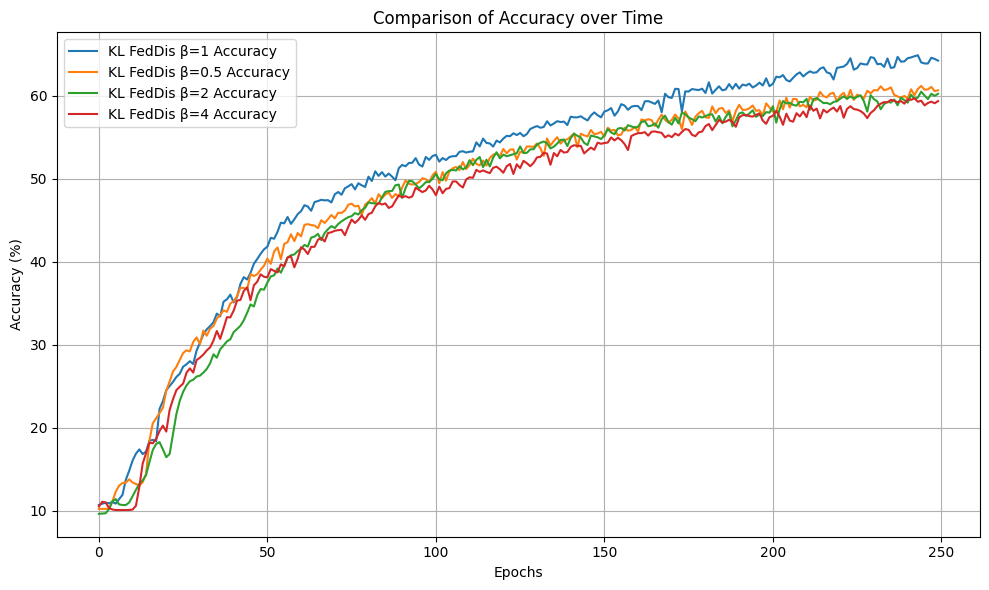

In [2]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
KL_FedDisb2_accuracy = [9.63, 9.66, 9.69, 10.19, 11.12, 11.4, 10.76, 10.69, 10.68, 11.0, 11.74, 12.52, 13.22, 13.65, 14.3, 15.85, 17.31, 18.05, 18.26, 17.39, 16.45, 16.84, 19.25, 21.64, 23.23, 24.31, 25.09, 25.59, 25.78, 26.16, 26.27, 26.63, 27.07, 27.75, 28.84, 28.43, 29.44, 29.9, 30.4, 30.64, 31.51, 31.88, 32.28, 32.94, 33.84, 34.84, 34.6, 35.94, 36.7, 36.62, 37.47, 38.22, 38.35, 39.17, 38.67, 39.55, 40.48, 40.77, 40.87, 41.27, 41.56, 42.02, 41.81, 42.9, 43.02, 43.35, 42.59, 43.45, 43.91, 44.28, 44.05, 44.53, 44.85, 45.12, 45.36, 45.48, 45.85, 45.68, 46.2, 46.48, 47.14, 47.04, 47.02, 46.96, 47.76, 48.41, 48.49, 48.51, 49.2, 49.28, 47.68, 48.86, 49.72, 49.69, 49.3, 48.83, 49.15, 49.57, 49.6, 49.96, 50.57, 49.92, 49.81, 50.64, 50.98, 51.04, 50.98, 51.5, 51.11, 51.37, 52.22, 51.62, 52.26, 52.6, 51.38, 52.28, 51.47, 52.54, 53.17, 52.44, 52.89, 52.7, 52.82, 52.95, 53.06, 53.88, 53.08, 53.11, 53.52, 53.55, 54.1, 54.32, 54.47, 54.26, 53.64, 53.85, 54.23, 54.66, 54.71, 53.92, 54.87, 55.42, 55.15, 54.94, 54.31, 54.05, 55.19, 55.08, 54.98, 54.77, 55.19, 55.97, 55.56, 55.35, 56.03, 56.1, 55.79, 56.44, 56.29, 56.14, 56.26, 56.83, 56.91, 56.31, 56.39, 56.64, 56.13, 57.17, 57.58, 56.82, 56.5, 57.32, 56.65, 57.97, 57.74, 57.36, 57.16, 56.92, 57.49, 57.36, 57.54, 57.71, 57.74, 56.89, 57.55, 56.67, 57.44, 57.99, 56.3, 57.02, 57.85, 57.98, 57.55, 57.84, 58.23, 57.45, 57.7, 57.53, 58.01, 57.95, 58.72, 56.74, 58.37, 59.35, 59.06, 59.14, 58.88, 58.79, 59.26, 59.19, 59.6, 58.29, 59.57, 59.7, 59.41, 59.1, 59.12, 58.96, 59.23, 59.34, 59.63, 59.91, 59.62, 59.9, 59.65, 59.85, 60.03, 59.32, 58.07, 60.05, 59.57, 59.29, 58.36, 58.99, 59.26, 59.16, 59.53, 58.83, 59.74, 59.46, 59.15, 60.1, 59.63, 59.76, 60.48, 60.01, 59.58, 60.22, 59.97, 60.22]
KL_FedDisb0_5_accuracy = [10.22, 10.22, 10.22, 10.25, 11.11, 12.28, 13.01, 13.34, 13.38, 13.78, 13.4, 13.21, 13.03, 13.43, 14.44, 18.44, 20.53, 21.15, 21.79, 22.38, 24.46, 25.56, 26.78, 27.32, 28.17, 28.99, 29.32, 29.2, 30.33, 30.88, 30.08, 31.7, 31.08, 31.93, 32.25, 33.14, 33.57, 34.14, 33.95, 34.96, 35.24, 35.84, 36.86, 36.83, 36.67, 38.49, 38.27, 38.49, 39.02, 39.51, 40.37, 39.73, 41.22, 41.71, 40.29, 42.13, 42.35, 43.3, 42.47, 43.45, 43.04, 44.43, 44.52, 44.4, 44.35, 44.03, 44.99, 44.66, 45.12, 45.62, 45.21, 45.89, 45.87, 46.16, 46.85, 46.98, 46.65, 46.74, 45.6, 46.88, 47.19, 47.65, 47.0, 48.12, 47.63, 48.08, 48.34, 47.68, 48.14, 47.84, 48.93, 49.78, 49.39, 49.29, 49.36, 49.58, 50.04, 49.93, 49.55, 50.39, 50.83, 49.44, 50.79, 49.75, 50.87, 51.24, 51.41, 51.02, 52.0, 51.15, 51.65, 52.41, 51.78, 51.59, 52.17, 51.57, 52.49, 52.88, 53.01, 52.71, 53.57, 53.05, 53.49, 53.53, 52.3, 53.22, 53.16, 53.88, 53.86, 53.82, 54.23, 53.68, 52.74, 54.84, 54.0, 54.54, 54.99, 54.22, 54.65, 54.72, 55.08, 55.43, 53.79, 55.41, 55.21, 55.08, 55.86, 55.35, 55.44, 55.64, 55.06, 56.13, 55.79, 55.87, 55.21, 55.3, 56.14, 55.77, 55.86, 56.25, 55.67, 57.13, 57.01, 57.16, 57.05, 56.34, 57.09, 57.7, 57.09, 56.75, 57.08, 57.72, 57.22, 55.95, 58.09, 57.33, 56.47, 57.46, 57.88, 58.17, 57.38, 57.32, 58.7, 57.88, 58.42, 58.52, 57.91, 58.22, 56.91, 58.15, 58.89, 58.28, 58.3, 58.46, 58.81, 58.16, 58.25, 57.62, 59.07, 58.56, 58.06, 58.0, 59.42, 58.35, 59.74, 58.55, 59.6, 59.58, 58.7, 58.89, 58.59, 59.86, 59.39, 59.52, 60.45, 59.93, 59.79, 60.22, 60.33, 59.3, 59.99, 60.34, 59.59, 60.69, 59.48, 60.11, 59.96, 59.67, 60.59, 60.27, 60.67, 60.62, 61.12, 60.66, 60.76, 60.99, 60.08, 59.9, 59.75, 59.96, 59.63, 60.76, 60.05, 60.79, 61.17, 60.71, 60.75, 61.05, 60.54, 60.64]
KL_FedDisb1_accuracy = [10.7, 10.85, 10.96, 10.9, 11.05, 10.86, 11.4, 11.9, 13.73, 14.81, 16.03, 16.87, 17.39, 16.82, 17.13, 18.42, 18.54, 18.37, 22.25, 23.2, 24.52, 25.03, 25.52, 26.11, 26.5, 27.34, 27.64, 28.01, 27.67, 29.3, 30.23, 31.23, 31.84, 32.24, 32.7, 33.74, 33.41, 35.18, 35.46, 36.03, 35.09, 35.76, 37.31, 38.13, 37.85, 38.65, 39.74, 40.32, 40.95, 41.48, 41.81, 42.87, 42.76, 43.58, 44.7, 44.61, 45.38, 44.55, 45.1, 45.72, 46.09, 46.8, 46.64, 46.13, 47.18, 47.3, 47.45, 47.38, 47.41, 47.13, 48.11, 48.39, 48.06, 48.84, 49.07, 49.34, 48.7, 49.44, 49.2, 48.99, 50.24, 49.72, 50.88, 50.33, 50.78, 50.25, 50.61, 50.24, 49.81, 51.26, 51.65, 51.49, 51.89, 51.91, 52.47, 51.69, 51.46, 52.61, 52.26, 52.72, 52.87, 52.05, 52.48, 52.24, 52.6, 52.7, 52.71, 53.23, 53.3, 53.14, 53.24, 53.28, 54.37, 53.88, 54.82, 54.3, 54.24, 53.86, 54.58, 54.36, 54.82, 55.15, 55.11, 55.46, 55.25, 55.5, 55.11, 55.37, 55.98, 56.17, 56.33, 56.13, 56.22, 56.91, 56.4, 56.64, 56.92, 56.82, 56.87, 56.45, 57.46, 57.38, 57.38, 57.51, 57.24, 57.01, 57.6, 57.98, 57.64, 57.38, 58.08, 58.23, 58.5, 57.58, 58.09, 58.97, 58.8, 58.29, 58.66, 58.76, 58.73, 58.25, 59.31, 59.34, 59.18, 59.0, 59.41, 57.99, 60.22, 59.81, 59.72, 60.82, 60.79, 58.07, 60.51, 60.49, 60.79, 60.72, 60.67, 60.83, 60.32, 61.6, 60.24, 60.69, 61.12, 60.64, 60.74, 61.39, 60.81, 61.42, 60.84, 61.33, 61.21, 61.44, 60.98, 61.21, 61.56, 61.22, 62.08, 61.13, 61.43, 62.28, 62.21, 62.47, 61.88, 61.7, 62.14, 62.55, 62.8, 62.31, 62.66, 62.92, 62.75, 62.81, 63.25, 63.41, 62.8, 62.66, 61.94, 63.34, 63.42, 63.5, 63.81, 64.5, 63.12, 63.32, 63.88, 63.77, 63.75, 64.63, 64.54, 63.78, 63.84, 63.46, 64.47, 63.33, 63.42, 64.67, 64.09, 64.12, 64.51, 64.6, 64.74, 64.86, 64.0, 63.87, 63.87, 64.56, 64.42, 64.21]
KL_FedDisb4_accuracy = [10.51, 11.08, 11.0, 10.34, 10.15, 10.08, 10.08, 10.08, 10.08, 10.09, 10.14, 10.6, 12.86, 15.67, 16.95, 18.19, 18.12, 18.67, 19.6, 20.25, 19.53, 22.15, 23.43, 24.52, 24.94, 25.31, 26.61, 27.15, 26.64, 28.15, 28.44, 28.81, 29.3, 29.67, 30.49, 31.65, 30.7, 31.97, 33.31, 33.29, 34.1, 35.3, 35.39, 36.47, 36.91, 35.36, 37.15, 37.59, 38.47, 38.18, 38.11, 39.1, 38.89, 38.7, 39.68, 39.43, 40.51, 40.64, 39.32, 40.34, 41.74, 41.46, 40.92, 41.78, 41.79, 42.63, 42.85, 42.43, 43.45, 43.54, 43.72, 43.79, 43.84, 43.18, 44.2, 45.07, 44.66, 45.04, 45.57, 45.04, 45.72, 45.89, 46.66, 47.08, 46.88, 47.02, 46.47, 46.65, 47.34, 47.98, 47.75, 47.89, 47.7, 47.86, 48.91, 48.63, 48.38, 48.57, 49.14, 48.7, 48.01, 49.04, 48.24, 48.76, 48.86, 49.66, 49.66, 49.24, 48.93, 49.91, 50.16, 50.1, 51.06, 50.81, 50.99, 50.81, 50.66, 51.31, 51.44, 51.13, 50.71, 51.48, 51.77, 50.56, 51.73, 51.27, 52.15, 51.86, 51.5, 51.9, 52.56, 52.62, 53.11, 53.02, 51.67, 53.08, 52.69, 53.46, 53.14, 53.2, 53.82, 54.02, 53.95, 53.95, 53.04, 53.41, 53.74, 53.47, 54.33, 54.2, 54.29, 54.34, 54.96, 54.6, 54.92, 54.63, 54.16, 53.44, 55.14, 55.33, 55.48, 55.48, 55.6, 55.18, 55.65, 55.68, 55.6, 55.51, 54.97, 55.22, 55.0, 55.43, 55.2, 55.63, 55.97, 55.88, 55.28, 55.11, 55.58, 55.67, 56.33, 56.58, 55.84, 56.45, 57.07, 56.76, 56.87, 57.09, 56.84, 56.24, 57.38, 57.64, 57.67, 57.53, 57.47, 57.68, 57.87, 56.99, 56.6, 57.4, 57.56, 58.17, 57.47, 56.48, 57.82, 56.99, 56.86, 57.88, 57.49, 58.08, 57.4, 58.81, 58.17, 58.43, 57.26, 58.31, 57.97, 58.3, 58.56, 58.08, 58.74, 57.33, 58.4, 58.72, 58.38, 58.31, 58.14, 57.83, 57.29, 57.91, 58.24, 58.75, 59.03, 59.22, 59.18, 59.49, 59.37, 59.2, 59.34, 59.03, 59.55, 59.49, 59.68, 59.26, 59.39, 58.82, 59.11, 59.27, 59.08, 59.34]



# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
plt.plot(KL_FedDisb0_5_accuracy, label='KL FedDis β=0.5 Accuracy')
plt.plot(KL_FedDisb2_accuracy, label='KL FedDis β=2 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')

plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')



# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
%%time
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch import nn
from typing import Dict

CPU times: user 6.62 s, sys: 763 ms, total: 7.39 s
Wall time: 10.8 s


In [ ]:
# Define VAE model
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim, z_dim):
        super(VAE, self).__init__()
        self.x_dim = x_dim
        self.h_dim = h_dim
        self.z_dim = z_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 4x4
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Linear(256, 2*z_dim)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 2048),
            nn.ReLU(),
            nn.Unflatten(1, (128, 4, 4)),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1),  # 32x32
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        mu, logvar = h[:, :self.z_dim], h[:, self.z_dim:]
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [ ]:
def vae_train(vae: VAE, trainloader: DataLoader, epochs: int, beta: float = 1.0) -> None:
    optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
    for epoch in range(epochs):
        for i, data in enumerate(trainloader, 0):
            inputs, _ = data
            optimizer.zero_grad()
            recon_x, mu, logvar = vae(inputs)
            loss = vae_loss(recon_x, inputs, mu, logvar, beta=beta)
            loss.backward()
            optimizer.step()



In [ ]:

# Define classification model
class Net(nn.Module):
    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load CIFAR10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

full_dataset = CIFAR10(root="./data", train=True, download=True, transform=transform)
test_set = CIFAR10(root="./data", train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 55.6MB/s]


In [ ]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])


In [ ]:
# Create training and validation loaders
trainloader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
valloader = DataLoader(val_set, batch_size=128, shuffle=False, num_workers=2)
testloader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers=2)


In [ ]:
def vae_loss(recon_x, x, mu, logvar, beta=1):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + beta * KLD


In [ ]:
# Define training procedure for classification model
def train(net: nn.Module, trainloader: DataLoader, valloader: DataLoader, epochs: int) -> None:
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    best_acc = 0.0

    for epoch in range(epochs):
        # Training loop
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation loop
        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in valloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(net.state_dict(), 'best_model.pth')

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss / (i+1):.3f}, Validation Accuracy: {val_acc:.2f}%")

In [ ]:
# Define evaluation procedure
def evaluate(net: nn.Module, testloader: DataLoader) -> float:
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [ ]:
def initialize_clients(trainset, transform, batch_size, num_clients):
    clients = {}
    for i in range(num_clients):
        client_trainset = torch.utils.data.Subset(trainset, range(i * len(trainset) // num_clients, (i + 1) * len(trainset) // num_clients))
        client_trainloader = torch.utils.data.DataLoader(client_trainset, batch_size=batch_size, shuffle=True)
        clients[f"client_{i}"] = client_trainloader
    return clients

In [ ]:
def get_distribution_info(vae: VAE) -> Dict:
    # Implement the logic to extract distribution information from the VAE
    # This can involve computing statistics, parameters, or any other relevant information
    # that can be used to generate augmented data

    # Example implementation:
    distribution_info = {
        "mean": vae.encoder[-1].bias.data.cpu().numpy(),
        "std": torch.exp(0.5 * vae.encoder[-1].weight.data).cpu().numpy()
    }

    return distribution_info

In [ ]:
def send_distribution_info(distribution_info: Dict) -> None:
    # Implement the logic to send the distribution information to the global server
    # This can involve using a network protocol, a message queue, or any other communication mechanism
    # to send the information

    # Example implementation:
    # Send the distribution information to the global server using a network protocol
    # For example, you can use the `socket` module to send the information over a network
    # or use a message queue like `RabbitMQ` to send the information
    pass


In [ ]:
# Define logic to generate augmented data using Ordinary Normal distribution
def generate_augmented_data(vae: VAE, distribution_info: Dict) -> torch.Tensor:
    # Generate augmented data using Ordinary Normal distribution
    mean = distribution_info["mean"]
    std = distribution_info["std"]
    augmented_data = torch.randn(64, vae.z_dim) * std + mean
    return augmented_data

In [ ]:
def federated_train(net: nn.Module, vae: VAE, trainloaders: Dict[str, DataLoader], trainloader: DataLoader, valloader: DataLoader, epochs: int) -> None:
    for epoch in range(epochs):
        for client_id, client_trainloader in trainloaders.items():
            # Train VAE on client data
            vae_train(vae, client_trainloader, epochs=10, beta=1)

            # Share distribution information with global server
            distribution_info = get_distribution_info(vae)
            send_distribution_info(distribution_info)

            # Receive distribution information from other clients
            other_distribution_info = receive_distribution_info()

            # Generate augmented data using received distribution information
            augmented_data = generate_augmented_data(vae, other_distribution_info)

            # Train classification model using local, augmented, and validation data
            train(net, client_trainloader, valloader, epochs=10)

            # Send model updates to global server
            send_model_update(client_id, net.state_dict())

In [ ]:
# Define logic to receive distribution information from global server
def receive_distribution_info() -> Dict:
    # Receive distribution information logic
    distribution_info = {
        "mean": np.zeros(20),  # Adjust the size based on your latent space dimension
        "std": np.ones(20)
    }
    return distribution_info

In [ ]:
def send_model_update(client_id: str, model_update: Dict) -> None:
    # Implement the logic to send the model update to the global server
    # This can involve using a network protocol, a message queue, or any other communication mechanism
    # to send the model update

    # Example implementation:
    # Send the model update to the global server using a network protocol
    # For example, you can use the `socket` module to send the information over a network
    # or use a message queue like `RabbitMQ` to send the information
    pass

In [ ]:
 print("True Positives (TP):", tp)
    print("False Positives (FP):", fp)
    print("True Negatives (TN):", tn)
    print("False Negatives (FN):", fn)
    print("Total Samples:", fn + tn + tp + fp)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
%%time

# Define global server procedure
def global_server() -> None:
    net = Net()
    x_dim = 3 * 32 * 32  # CIFAR-10 input size
    h_dim = 400
    z_dim = 20
    vae = VAE(x_dim, h_dim, z_dim)  # Initialize VAE object with required arguments

    # Initialize clients
    num_clients = 5  # Define the number of clients
    clients = initialize_clients(train_set, transform, batch_size=128, num_clients=num_clients)

    # Train model using FedDIS
    federated_train(net, vae, clients, trainloader, valloader, epochs=1)

    # Evaluate final model
    test_accuracy = evaluate(net, testloader)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

if __name__ == "__main__":
    global_server()

/tmp/ipython-input-35-3419885715.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  augmented_data = torch.randn(64, vae.z_dim) * std + mean


Epoch [1/10], Training Loss: 2.303, Validation Accuracy: 9.99%
Epoch [2/10], Training Loss: 2.302, Validation Accuracy: 9.99%
Epoch [3/10], Training Loss: 2.302, Validation Accuracy: 10.15%
Epoch [4/10], Training Loss: 2.301, Validation Accuracy: 10.62%
Epoch [5/10], Training Loss: 2.300, Validation Accuracy: 10.49%
Epoch [6/10], Training Loss: 2.299, Validation Accuracy: 10.43%
Epoch [7/10], Training Loss: 2.298, Validation Accuracy: 11.52%
Epoch [8/10], Training Loss: 2.296, Validation Accuracy: 13.86%
Epoch [9/10], Training Loss: 2.294, Validation Accuracy: 15.12%
Epoch [10/10], Training Loss: 2.292, Validation Accuracy: 14.71%
Epoch [1/10], Training Loss: 2.290, Validation Accuracy: 15.41%
Epoch [2/10], Training Loss: 2.286, Validation Accuracy: 16.32%
Epoch [3/10], Training Loss: 2.280, Validation Accuracy: 16.72%
Epoch [4/10], Training Loss: 2.272, Validation Accuracy: 17.02%
Epoch [5/10], Training Loss: 2.260, Validation Accuracy: 17.16%
Epoch [6/10], Training Loss: 2.244, Valid